### 01. Import libraries and data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Set path
path = r'/home/scruffy/anaconda_projects/Instacart Basket Analysis/'

# Import data to dataframe
df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_cust_new_cols.pkl'))
cust = pd.read_csv(os.path.join(path, '02 Data','Original Data', 'customers.csv'))

In [5]:
# Rename columns in customers.csv
cust.rename(columns = {'First Name' : 'first_name', 'Surnam' : 'last_name', 'Gender' : 'gender', 'STATE' : 'state', 'Age' : 'age', 'n_dependants' : 'n_dependents'}, inplace = True)

In [4]:
# Check import
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   product_id              int32  
 1   product_name            object 
 2   aisle_id                int8   
 3   department_id           int8   
 4   prices                  float16
 5   order_id                int32  
 6   user_id                 int32  
 7   order_number            int8   
 8   order_dow               int8   
 9   order_hour_of_day       int8   
 10  days_since_prior_order  float16
 11  add_to_cart_order       int32  
 12  reordered               int8   
 13  first_name              object 
 14  last_name               object 
 15  gender                  object 
 16  state                   object 
 17  age                     int8   
 18  date_joined             object 
 19  n_dependents            int8   
 20  fam_status              object 
 21  income                  int32

/home/scruffy/anaconda3/lib/python3.12/site-packages/pandas/core/nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
/home/scruffy/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/scruffy/anaconda3/lib/python3.12/site-packages/pandas/core/nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan
/home/scruffy/anaconda3/lib/python3.12/site-packages/pandas/core/nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
/home/scruffy/anaconda3/lib/python3.12/site-packages/pandas/core/nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
/home/scruffy/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keep

         product_id      aisle_id  department_id        prices      order_id  \
count  3.240486e+07  3.240486e+07   3.240486e+07  3.239973e+07  3.240486e+07   
mean   2.559866e+04  6.449111e+01   9.919792e+00           NaN  1.710745e+06   
std    1.408400e+04  4.843815e+01   6.281485e+00  0.000000e+00  9.872988e+05   
min    1.000000e+00 -1.280000e+02   1.000000e+00  1.000000e+00  2.000000e+00   
25%    1.354400e+04  2.400000e+01   4.000000e+00  4.199219e+00  8.559470e+05   
50%    2.530200e+04  7.900000e+01   9.000000e+00  7.398438e+00  1.711049e+06   
75%    3.794700e+04  1.000000e+02   1.600000e+01  1.129688e+01  2.565499e+06   
max    4.968800e+04  1.270000e+02   2.100000e+01  2.500000e+01  3.421083e+06   

            user_id  order_number     order_dow  order_hour_of_day  \
count  3.240486e+07  3.240486e+07  3.240486e+07       3.240486e+07   
mean   1.029372e+05  1.714230e+01  2.738867e+00       1.342515e+01   
std    5.946610e+04  1.753532e+01  2.090077e+00       4.246380e+00   

### 02. Histogram

<Axes: ylabel='Frequency'>

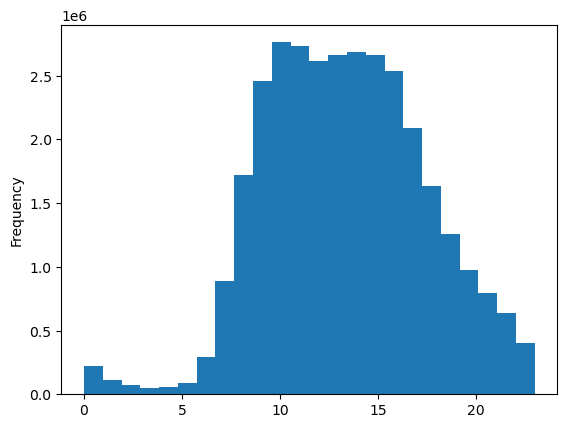

In [16]:
# Create histogram of orders by hour of day
df['order_hour_of_day'].plot.hist(bins = 24)

### The histogram shows that the number of orders per hour has a bimodal distribution, increasing sharply from 5:00 AM to 10:00 AM before dropping a bit to a trough at 12:00 PM when most people are at lunch, then increasing slightly through the afternoon and finally tapering off through the late evening, reaching its lowest levels between 1:00 AM and 5:00 AM.

### 03. Bar chart

Axes(0.125,0.11;0.775x0.77)


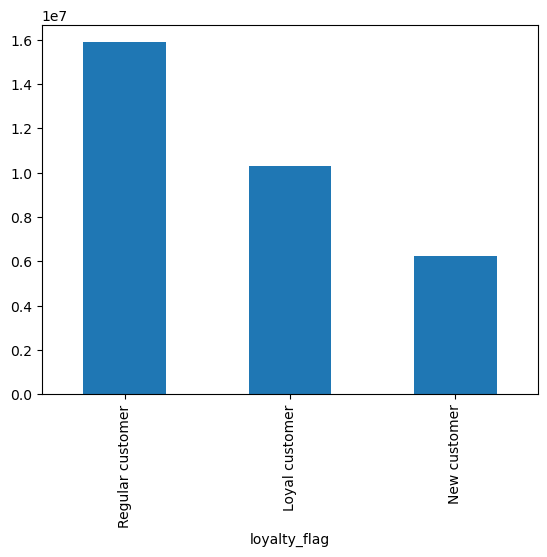

In [51]:
# Create bar chart showing number of orders by loyalty flag group
bar = df['loyalty_flag'].value_counts().plot.bar()
print(bar)

### 04. Line chart - prices vs hour

In [20]:
# Set random seed and sample size
np.random.seed(471)
dev = np.random.rand(len(df)) <= 0.7

big = df[dev]
small = df[~dev]

Axes(0.125,0.11;0.775x0.77)


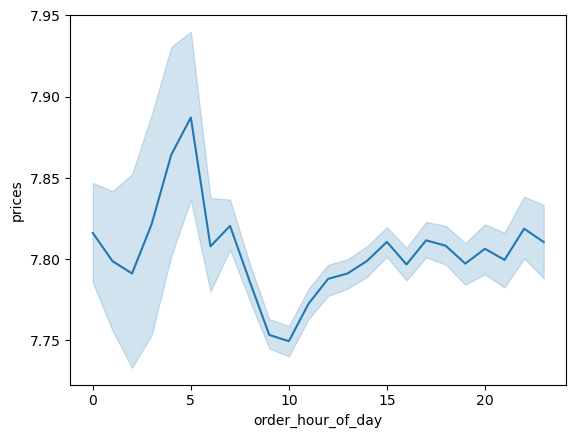

In [22]:
# Create dataframe with relevant columns only
df_2 = small[['order_hour_of_day','prices']]

# Create line chart of prices vs hour of day
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')
print(line)

In [24]:
# Export line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prices_v_hour.png'))

### 05. Line chart - age vs dependents

Axes(0.125,0.11;0.775x0.77)


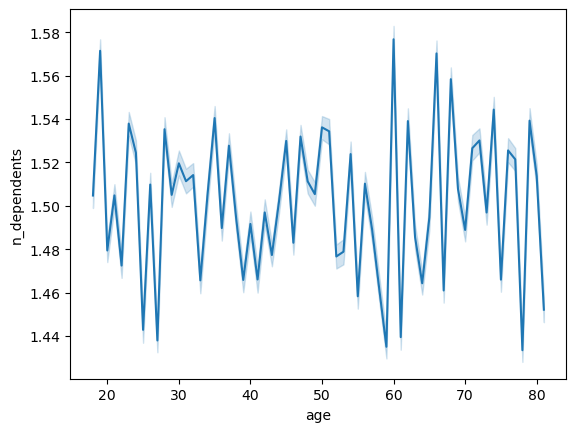

In [26]:
# Create dataframe with relevant columns only
df_3 = small[['age','n_dependents']]

# Create line chart
line2 = sns.lineplot(data = df_3, x = 'age',y = 'n_dependents')
print(line2)

Axes(0.125,0.11;0.775x0.77)


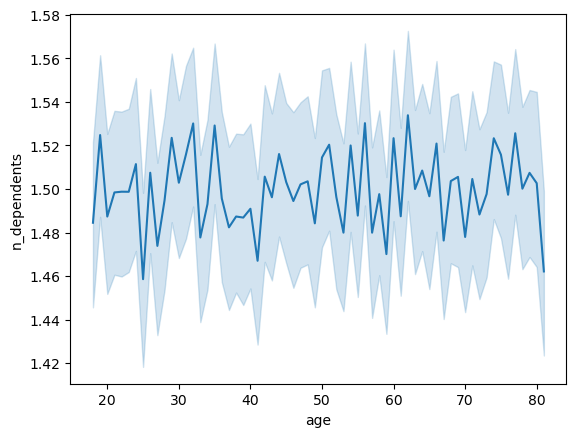

In [7]:
# Repeat line chart using full data from customers.csv
# Create dataframe with relevant columns only
df_4 = cust[['age','n_dependents']]

# Create line chart
line3 = sns.lineplot(data = df_4, x = 'age',y = 'n_dependents')
print(line3)

#### This line chart suggests that there is no relationship in our data between age and number of dependents.
#### It also shows that there is a wide range in the number of dependents for people of the same age.

Axes(0.125,0.11;0.775x0.77)


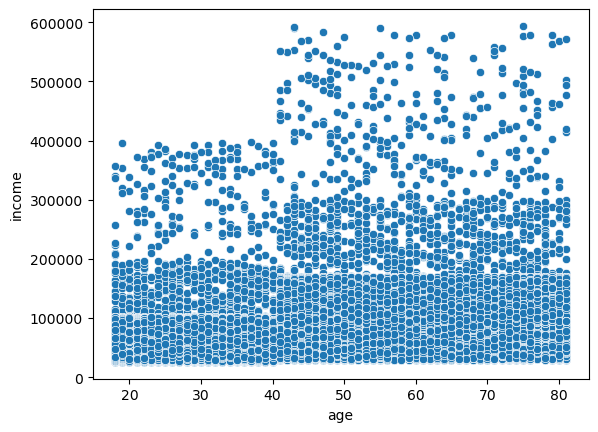

In [37]:
# Create line chart
scatter = sns.scatterplot(x = 'age',y = 'income', data = cust[['age','income']])
print(scatter)

#### This scatterplot suggests that there is a positive relationship between age and income.
#### We have no customers below the age of 40 who make more than 400,000 annually, and a much greater density of customers over the age of 40 in the 200,000 - 300,000 range.
#### In general, it appears our customers have extremely high incomes.

In [39]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_bar.png'))
line3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_v_dependents.png'))
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_v_income.png'))